In [1]:
#proudly created by Harsh Nagoriya
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import os
import cv2

Using TensorFlow backend.


In [2]:
DATADIR='D:\\HSNProjects\\ML\\Guj\\test'
CATEGORIES = ['ALA','ANA','B','BHA','CH','CHH','D','DA','DH','DHA','F','G','GH','GNA','H','J','JH','K','KH','KSH','L','M','N','P','R','S','SH','SHH','T','TA','TH','THA','V','Y']

In [3]:
for category in CATEGORIES :
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

In [4]:
IMG_SIZE = 50
training_data = []

In [13]:
def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
                print(class_num)
            except Exception as e:
                pass

In [14]:
create_training_data()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5


31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33


In [17]:
import random
random.shuffle(training_data)
training_data

[[array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  28],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  1],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  14],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255,

In [18]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    

In [23]:
y

[28,
 1,
 14,
 14,
 16,
 21,
 27,
 22,
 18,
 2,
 3,
 25,
 14,
 9,
 26,
 2,
 18,
 14,
 22,
 15,
 2,
 7,
 17,
 21,
 4,
 4,
 11,
 10,
 18,
 28,
 6,
 32,
 9,
 11,
 10,
 24,
 5,
 33,
 33,
 21,
 12,
 23,
 13,
 33,
 15,
 23,
 20,
 7,
 0,
 6,
 10,
 0,
 15,
 9,
 23,
 7,
 0,
 5,
 3,
 28,
 0,
 9,
 20,
 13,
 25,
 5,
 23,
 29,
 29,
 31,
 13,
 30,
 29,
 26,
 33,
 30,
 0,
 4,
 6,
 3,
 16,
 26,
 14,
 14,
 1,
 12,
 30,
 19,
 16,
 0,
 19,
 12,
 1,
 8,
 14,
 26,
 3,
 6,
 18,
 22,
 20,
 2,
 21,
 14,
 0,
 29,
 9,
 19,
 25,
 4,
 15,
 6,
 5,
 1,
 29,
 17,
 2,
 2,
 14,
 23,
 14,
 30,
 24,
 19,
 14,
 10,
 16,
 20,
 21,
 12,
 3,
 27,
 33,
 13,
 18,
 20,
 25,
 4,
 3,
 23,
 31,
 31,
 14,
 4,
 26,
 24,
 24,
 31,
 32,
 14,
 21,
 24,
 28,
 9,
 17,
 7,
 16,
 6,
 12,
 6,
 23,
 21,
 2,
 4,
 19,
 17,
 11,
 17,
 6,
 21,
 31,
 0,
 2,
 12,
 19,
 0,
 15,
 11,
 18,
 18,
 7,
 9,
 3,
 30,
 22,
 21,
 15,
 0,
 32,
 31,
 9,
 9,
 1,
 17,
 5,
 10,
 18,
 9,
 31,
 22,
 9,
 5,
 13,
 33,
 28,
 2,
 22,
 18,
 4,
 6,
 6,
 17,
 20,
 9,
 9,

In [24]:
import pickle
#proudly created by Harsh Nagoriya
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [25]:
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [26]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [27]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

In [34]:
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0
#proudly created by Harsh Nagoriya
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(34))
model.add(Activation("softmax"))

model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])



In [35]:
y

[28,
 1,
 14,
 14,
 16,
 21,
 27,
 22,
 18,
 2,
 3,
 25,
 14,
 9,
 26,
 2,
 18,
 14,
 22,
 15,
 2,
 7,
 17,
 21,
 4,
 4,
 11,
 10,
 18,
 28,
 6,
 32,
 9,
 11,
 10,
 24,
 5,
 33,
 33,
 21,
 12,
 23,
 13,
 33,
 15,
 23,
 20,
 7,
 0,
 6,
 10,
 0,
 15,
 9,
 23,
 7,
 0,
 5,
 3,
 28,
 0,
 9,
 20,
 13,
 25,
 5,
 23,
 29,
 29,
 31,
 13,
 30,
 29,
 26,
 33,
 30,
 0,
 4,
 6,
 3,
 16,
 26,
 14,
 14,
 1,
 12,
 30,
 19,
 16,
 0,
 19,
 12,
 1,
 8,
 14,
 26,
 3,
 6,
 18,
 22,
 20,
 2,
 21,
 14,
 0,
 29,
 9,
 19,
 25,
 4,
 15,
 6,
 5,
 1,
 29,
 17,
 2,
 2,
 14,
 23,
 14,
 30,
 24,
 19,
 14,
 10,
 16,
 20,
 21,
 12,
 3,
 27,
 33,
 13,
 18,
 20,
 25,
 4,
 3,
 23,
 31,
 31,
 14,
 4,
 26,
 24,
 24,
 31,
 32,
 14,
 21,
 24,
 28,
 9,
 17,
 7,
 16,
 6,
 12,
 6,
 23,
 21,
 2,
 4,
 19,
 17,
 11,
 17,
 6,
 21,
 31,
 0,
 2,
 12,
 19,
 0,
 15,
 11,
 18,
 18,
 7,
 9,
 3,
 30,
 22,
 21,
 15,
 0,
 32,
 31,
 9,
 9,
 1,
 17,
 5,
 10,
 18,
 9,
 31,
 22,
 9,
 5,
 13,
 33,
 28,
 2,
 22,
 18,
 4,
 6,
 6,
 17,
 20,
 9,
 9,

In [36]:
history = model.fit(x=np.array(X), y=np.array(y), batch_size=33, epochs=40, validation_split=0.1)

model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")
#proudly created by Harsh Nagoriya
model.save('CNN.model')



Train on 9096 samples, validate on 1011 samples
Epoch 1/40
9096/9096 [==============================] - 25s 3ms/sample - loss: 1.4816 - accuracy: 0.6031 - val_loss: 0.0798 - val_accuracy: 0.9862
Epoch 2/40
9096/9096 [==============================] - 22s 2ms/sample - loss: 0.0778 - accuracy: 0.9864 - val_loss: 0.0185 - val_accuracy: 0.9990
Epoch 3/40
9096/9096 [==============================] - 23s 3ms/sample - loss: 0.0308 - accuracy: 0.9935 - val_loss: 0.0115 - val_accuracy: 0.9990
Epoch 4/40
9096/9096 [==============================] - 23s 2ms/sample - loss: 0.0273 - accuracy: 0.9957 - val_loss: 0.0074 - val_accuracy: 0.9990
Epoch 5/40
9096/9096 [==============================] - 24s 3ms/sample - loss: 0.0192 - accuracy: 0.9974 - val_loss: 0.0165 - val_accuracy: 0.9960
Epoch 6/40
9096/9096 [==============================] - 23s 3ms/sample - loss: 0.0144 - accuracy: 0.9969 - val_loss: 0.0079 - val_accuracy: 0.9990
Epoch 7/40
9096/9096 [==============================] - 23s 3ms/sample

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


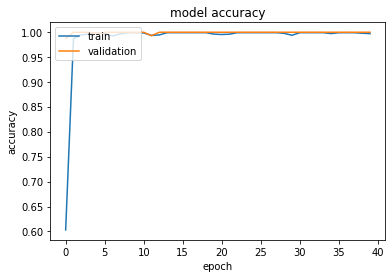

In [38]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [64]:
def xprepare(file):
    IMG_SIZE = 50
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array)
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#proudly created by Harsh Nagoriya

ALA


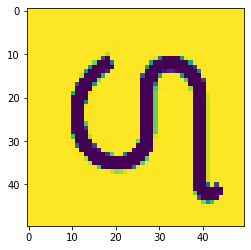

In [65]:
#proudly created by Harsh Nagoriya
model = tf.keras.models.load_model("CNN.model")
image = "D:\\HSNProjects\\ML\\guj\\check\\ala.png"
image=xprepare(image)
prediction = model.predict([image])
prediction = list(prediction[0])
print(CATEGORIES[prediction.index(max(prediction))])

DH


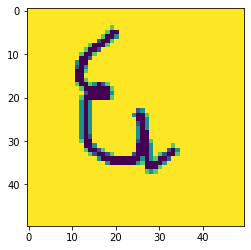

In [72]:
#proudly created by Harsh Nagoriya
model = tf.keras.models.load_model("CNN.model")
image = "D:\\HSNProjects\\ML\\guj\\check\\Untitled.png"
image=xprepare(image)
prediction = model.predict([image])
prediction = list(prediction[0])
print(CATEGORIES[prediction.index(max(prediction))])

GNA


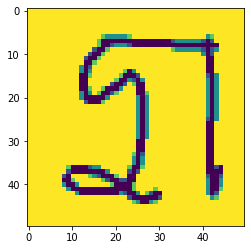

In [74]:
#proudly created by Harsh Nagoriya
model = tf.keras.models.load_model("CNN.model")
image = "D:\\HSNProjects\\ML\\guj\\check\\Untitled1.png"
image=xprepare(image)
prediction = model.predict([image])
prediction = list(prediction[0])
print(CATEGORIES[prediction.index(max(prediction))])

N


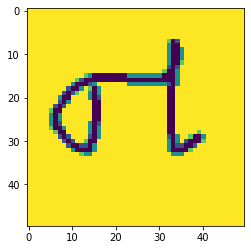

In [77]:
#proudly created by Harsh Nagoriya
model = tf.keras.models.load_model("CNN.model")
image = "D:\\HSNProjects\\ML\\guj\\check\\Untitled2.png"
image=xprepare(image)
prediction = model.predict([image])
prediction = list(prediction[0])
print(CATEGORIES[prediction.index(max(prediction))])